In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# d1 = pd.read_csv('data/w.csv')
# d2 = pd.read_csv('data/s.csv')
# df = pd.concat([d1,d2])
# df = df.loc[:, ['word', 'pos']]
# df = df[df.word.str.match('^\w+$')]

In [38]:
df = pd.read_csv('data/all.csv')
# df = pd.read_csv('example.csv')
df

,word,pos
0,wā,in
1,wāc,aj
2,wāc,aj
3,wāc,n
4,wāc,aj
...,...,...
7940,sǣȳþ,n
7941,sǣæbbung,n
7942,sǣǣl,n
7943,sǣælfen,n


In [39]:
df.loc[:20].to_csv('example.csv', index=False)
df.to_csv('data/all.csv', index=False)

In [4]:
df1 = df[df.pos == 'aj']
df1

,word,pos
5,wāc,aj
6,wāc,aj
8,wāc,aj
9,wāc,aj
10,wāc,aj
...,...,...
4830,sǣne,aj
4833,sǣnig,aj
4838,sæpig,aj
4843,sǣrōf,aj


In [5]:
aj_pol = pd.DataFrame(df1.pivot_table(index=['word'], aggfunc='size'), columns=['pol'])
aj_pol['word'] = aj_pol.index
aj_pol['len'] = aj_pol.word.apply(len)
aj_pol

,pol,word,len
word,,,
sacful,2,sacful,6
saclēas,3,saclēas,7
sadolbeorht,1,sadolbeorht,11
saducēisc,1,saducēisc,9
saftriende,1,saftriende,10
...,...,...,...
wǣr,1,wǣr,3
wǣrfæst,3,wǣrfæst,7
wǣrlēas,2,wǣrlēas,7


In [6]:
mean_pol_aj = pd.pivot_table(aj_pol, index=['pol'], values=['len'],aggfunc=[np.mean, 'count'], fill_value=0) 
mean_pol_aj

,mean,count
,len,len
pol,,
1,8.429326,757
2,7.693333,150
3,6.534884,43
4,6.250000,20
5,5.307692,13
6,5.300000,10
7,4.900000,10
8,6.000000,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

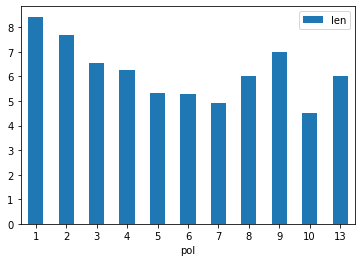

In [7]:
mean_pol_aj['pol'] = mean_pol_aj.index
mean_pol_aj.plot.bar(x='pol', y='mean')
plt.xticks(rotation='horizontal')

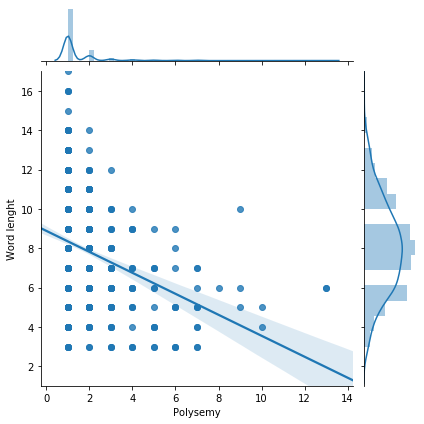

In [8]:
import seaborn as sns
aj = sns.jointplot("pol", "len", data=aj_pol, kind='reg', ylim=[1,aj_pol.len.max()]);
aj.set_axis_labels("Polysemy", "Word lenght");
# g3.fig.suptitle('Correlation between polysemy and word lenght')

In [9]:
from scipy import stats
stats.ttest_ind(aj_pol.pol, aj_pol.len)

Ttest_indResult(statistic=-77.0249581787029, pvalue=0.0)

In [10]:
stats.pearsonr(aj_pol.pol, aj_pol.len)

(-0.295813434901177, 7.255076057272829e-22)

In [11]:
stats.spearmanr(aj_pol.pol, aj_pol.len)

SpearmanrResult(correlation=-0.2800902560451858, pvalue=1.115159394716852e-19)

In [12]:
stats.kendalltau(aj_pol.pol, aj_pol.len)

KendalltauResult(correlation=-0.23505292073792758, pvalue=2.5813233539235974e-19)

In [13]:
df2 = df[df.pos == 'n']
n_pol = pd.DataFrame(df2.pivot_table(index=['word'], aggfunc='size'), columns=['pol'])
n_pol['word'] = n_pol.index
n_pol['len'] = n_pol.word.apply(len)
n_pol

,pol,word,len
word,,,
Suþseaxisc,1,Suþseaxisc,10
saban,1,saban,5
sabbat,1,sabbat,6
sacc,1,sacc,4
sacu,6,sacu,4
...,...,...,...
wǣta,6,wǣta,4
wǣtnes,1,wǣtnes,6
wǣtung,1,wǣtung,6


In [14]:
mean_pol_n = pd.pivot_table(n_pol, index=['pol'], values=['len'],aggfunc=[np.mean, 'count'], fill_value=0) 
mean_pol_n

,mean,count
,len,len
pol,,
1,8.326244,2774
2,7.147806,433
3,6.386364,132
4,5.746032,63
5,5.967742,31
6,4.838710,31
7,5.363636,11
8,5.666667,9


In [15]:
stats.ttest_ind(n_pol.pol, n_pol.len)

Ttest_indResult(statistic=-144.94102847332056, pvalue=0.0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

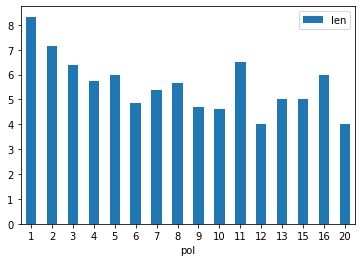

In [16]:
mean_pol_n['pol'] = mean_pol_n.index
mean_pol_n.plot.bar(x='pol', y='mean')
plt.xticks(rotation='horizontal')

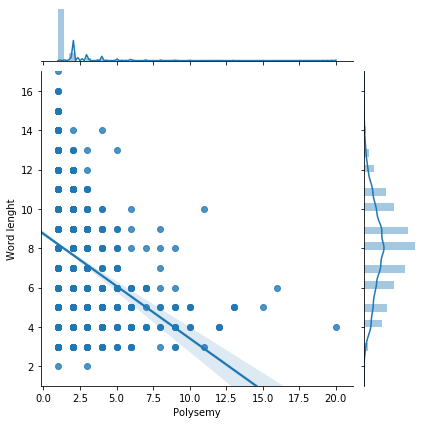

In [17]:
import seaborn as sns
n = sns.jointplot("pol", "len", data=n_pol, kind='reg', ylim=[1,n_pol.len.max()]);
n.set_axis_labels("Polysemy", "Word lenght");
# g.fig.suptitle('Correlation between polysemy and word lenght')

In [18]:
stats.pearsonr(n_pol.pol, n_pol.len)

(-0.2916974115635092, 8.374842597058952e-70)

In [19]:
stats.spearmanr(n_pol.pol, n_pol.len)

SpearmanrResult(correlation=-0.30918394318067943, pvalue=1.255641683789887e-78)

In [20]:
stats.kendalltau(n_pol.pol, n_pol.len)

KendalltauResult(correlation=-0.26073824709127547, pvalue=3.734873076755039e-76)

In [21]:
df3 = df[df.pos == 'v']
df3

,word,pos
12,wacan,v
21,wacian,v
22,wacian,v
23,wācian,v
24,wācian,v
...,...,...
4709,sypian,v
4759,sǣdian,v
4760,sǣdian,v
4783,sǣgan,v


In [22]:
v_pol = pd.DataFrame(df3.pivot_table(index=['word'], aggfunc='size'), columns=['pol'])
v_pol['word'] = v_pol.index
v_pol['len'] = v_pol.word.apply(len)
v_pol

,pol,word,len
word,,,
sacan,5,sacan,5
sacian,1,sacian,6
sadian,1,sadian,6
salletan,2,salletan,8
samnian,3,samnian,7
...,...,...,...
wǣfan,1,wǣfan,5
wǣgan,1,wǣgan,5
wǣtan,1,wǣtan,5


In [23]:
stats.ttest_ind(v_pol.pol, v_pol.len)

Ttest_indResult(statistic=-54.55859400199344, pvalue=7.64689279725157e-298)

In [24]:
mean_pol_v = pd.pivot_table(v_pol, index=['pol'], values=['len'],aggfunc=[np.mean, 'count'], fill_value=0) 
mean_pol_v

,mean,count
,len,len
pol,,
1,7.725424,295
2,7.112150,107
3,6.690476,42
4,6.615385,13
5,6.090909,11
6,6.666667,6
7,7.666667,3
8,8.000000,3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

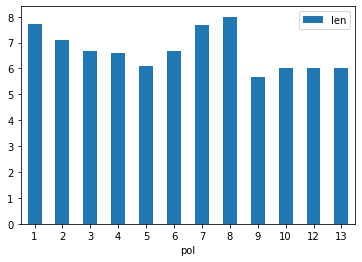

In [25]:
mean_pol_v['pol'] = mean_pol_v.index
mean_pol_v.plot.bar(x='pol', y='mean')
plt.xticks(rotation='horizontal')

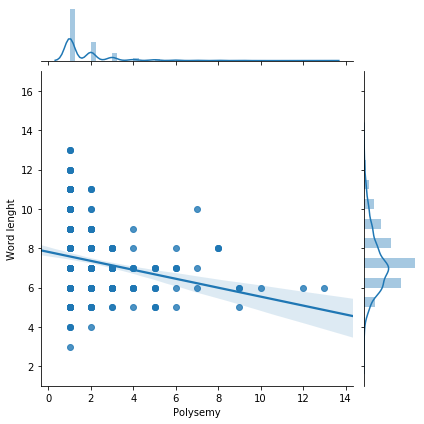

In [26]:
v = sns.jointplot("pol", "len", data=v_pol, kind='reg', ylim=[1,n_pol.len.max()]);
v.set_axis_labels("Polysemy", "Word lenght");
# g1.fig.suptitle('Correlation between polysemy and word lenght')

In [27]:
stats.kendalltau(v_pol.pol, v_pol.len)

KendalltauResult(correlation=-0.2235368313739835, pvalue=4.247395852134361e-09)

In [28]:
stats.spearmanr(v_pol.pol, v_pol.len)

SpearmanrResult(correlation=-0.2619594245484128, pvalue=4.550707114239354e-09)

In [29]:
stats.pearsonr(v_pol.pol, v_pol.len)

(-0.21873592097431196, 1.1228541212466035e-06)